参考：https://zhuanlan.zhihu.com/p/51516385

数据集描述（只对有必要说明的做解释）

- Id - 表示测试集中的（存储，日期）重复的Id
- Store- 每家商店的唯一ID
- Sales - 任何一天的营业额（这是您预测的）
- Customers- 特定日期的客户数量
- Open - 商店是否营业的指标：0 =关闭，1 =打开
- StateHoliday - 表示州假日。通常情况下，除了少数例外，所有商店都会在州假期关闭。请注意，所有学校在公众假期和周末都关闭。a =公共假日，b =复活节假期，c =圣诞节，0 =无
- SchoolHoliday - 表示（商店，日期）是否受到公立学校关闭的影响
- StoreType - 区分4种不同的商店模型：a，b，c，d
- Assortment- 描述分类级别：a =基本，b =额外，c =扩展
- CompetitionDistance - 距离最近的竞争对手商店的距离（以米为单位）
- CompetitionOpenSince [Month / Year] - 给出最接近的竞争对手开放时间的大致年份和月份
- Promo- 指示商店当天是否正在运营促销
- Promo2 - Promo2是一些商店的持续和连续促销：0 =商店不参与，1 =商店参与
- Promo2Since [年/周] - 描述商店开始参与Promo2的年份和日历周
- PromoInterval - 描述Promo2启动的连续间隔，命名重新开始促销的月份。例如，“2月，5月，8月，11月”意味着每一轮在该商店的任何给定年份的2月，5月，8月和11月开始

# 导入与查看数据集情况

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 设置 seaborn 或 matplotlib显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

In [2]:
# 导入数据 

#parse_dates=[2] 表示将 数据集的第3个字段转换为 日期（datetime64）格式
data_store = pd.read_csv('data/all/store.csv')
data_train= pd.read_csv('data/all/train.csv', parse_dates=[2])
data_test= pd.read_csv('data/all/test.csv', parse_dates=[3])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#查看训练数据的 前5条 和最后 5条数据
data_train.head().append(data_train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


## 查看数据集信息

In [4]:
#数据集 与 数据集的名称
datas=[data_store,data_train,data_test]
data_names=['data_store','data_train','data_test']

for data,data_name in zip(datas,data_names):
    print('{:*^50}'.format('{}数据信息').format(data_name))
    print(data.info()) 
    
    print('\n','字段唯一值数量:')    
    for column in data.columns:
        print('{}:'.format(column),len(data[column].unique()))
    
    print('\n','字段是否含空值')
    print(data.isnull().any(axis=0))
    
    print('\n','含空值行的数量')
    print(data.isnull().any(axis=1).sum())
    
    print('\n','\n')    

**********************data_store数据信息**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None

 字段唯一值数量:
Store: 1115
StoreType: 4
Assortment: 3
CompetitionDistance: 655
CompetitionOpenSinceMonth: 13
CompetitionOpenSinceYear: 24
Promo2: 2
Promo2SinceWeek: 25
Promo2SinceYear: 8
PromoInterval: 4

 字段是否含空值
Store                        False
StoreType              

## 观察每个特征唯一值数量，对异常值进行处理

### 整理数据

In [5]:
#发现StateHoliday有5个，异常，检验处理以下
#字符0和数字重叠
data_train.StateHoliday=data_train.StateHoliday.map({'0':'无',0:'无','a':'公共假日','b':'复活节假期','c':'圣诞节'})
data_train.StateHoliday.unique()

array(['无', '公共假日', '复活节假期', '圣诞节'], dtype=object)

# 连接表相关表

In [6]:
data_train_new=pd.merge(data_train, data_store, on='Store', how='left')
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,无,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,无,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,无,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,无,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,无,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
#对data_train_new日期进行年，月，日进行处理
data_train_new['year']=data_train_new.Date.map(lambda x:x.year)
data_train_new['month']=data_train_new.Date.map(lambda x:x.month)
data_train_new['day']=data_train_new.Date.map(lambda x:x.day)
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,无,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,无,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,无,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,无,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,无,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


# 探索性数据分析

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, '商店销售总额的分布')

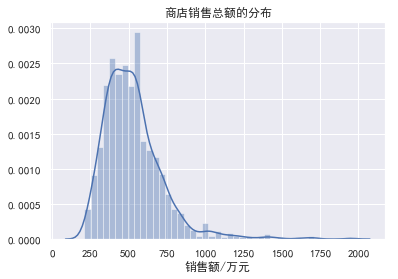

In [47]:
df1=data_train_new.groupby('Store')['Sales'].sum().div(10000)
sns.distplot(df1)
plt.xlabel('销售额/万元')
plt.title('商店销售总额的分布')

Text(0.5, 1.0, '一周中每天平均销售额')

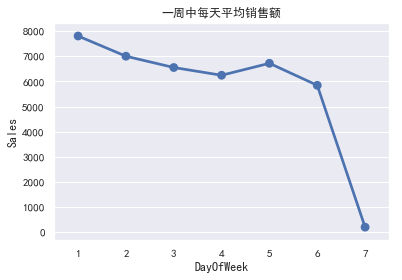

In [9]:
#reset_index()：重新生成 DataFrame or Series 
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
sns.pointplot(data=df2, x='DayOfWeek', y='Sales')
plt.title('一周中每天平均销售额')

Text(0.5, 1.0, '一周平均营业率')

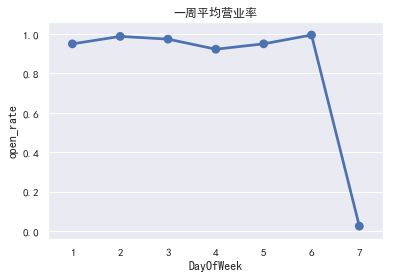

In [10]:
#平均营业率/周
df3=data_train_new.groupby('DayOfWeek')['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('一周平均营业率')

Text(0.5, 1.0, '商店每月平均销售额情况')

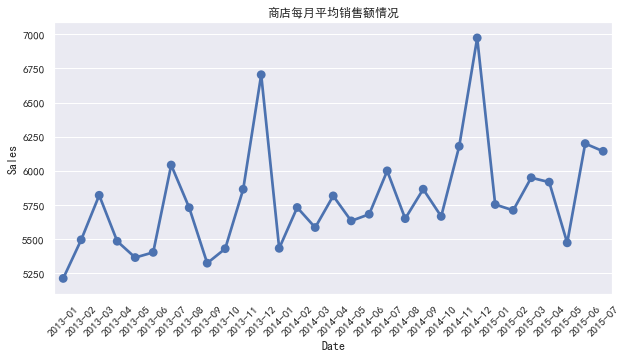

In [49]:
#resample:对Date日期截取到月，然后根据这个截取字段 进行统计。（M:表示截取到月， kind='period'：表示Date是日期字段）
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M', kind='period').mean().reset_index()
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)

sns.pointplot(data=df4, x='Date', y='Sales', ax=ax)
plt.xticks(rotation=45)
ax.set_title('商店每月平均销售额情况')

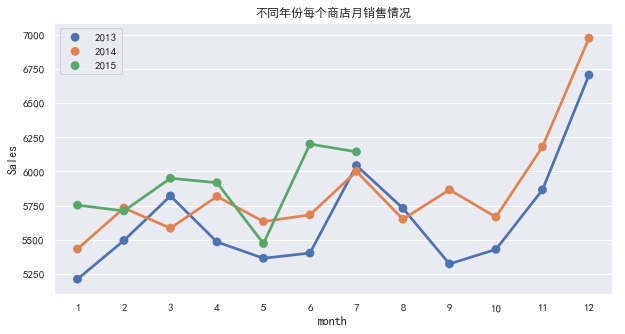

In [12]:
#不同年每个月份平均销售情况
df5=data_train_new.groupby([data_train_new.year,data_train_new.month]).Sales.mean().reset_index()
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)

sns.pointplot(data=df5, x='month', y='Sales', hue='year', ax=ax)
ax.set_title('不同年份每个商店月销售情况')
plt.legend(loc='best')

No handles with labels found to put in legend.


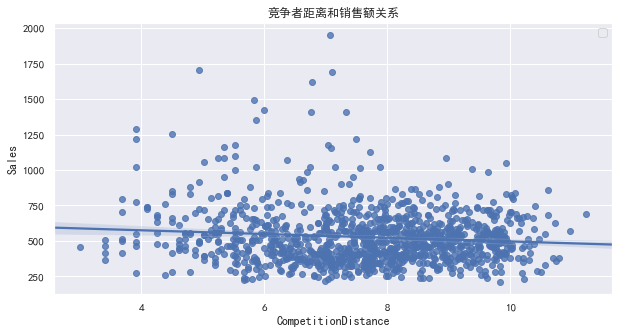

In [13]:
#探索竞争者距离和销售额关系
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})#每个店销售总额
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x))#对距离取log，收缩分布
df7['Sales']=df7['Sales'].div(10000).map(lambda x:x)#销售额以万元为单位

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)

sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('竞争者距离和销售额关系')
plt.legend(loc='best')

可以看出在一定的距离范围中，有不少商店会获得比其他店更高的销售额

In [14]:
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,无,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,无,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,无,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,无,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,无,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


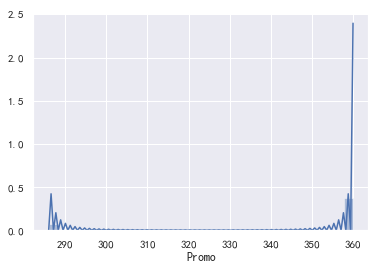

In [15]:
#店铺促销次数比例分布
df7=data_train_new.groupby('Store')['Promo'].sum()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.distplot(df7,ax=ax)

[Text(0.5, 1.0, '店铺促销次数分布')]

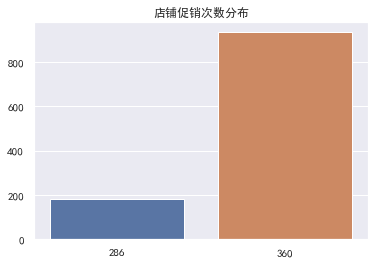

In [16]:
df8=df7.value_counts()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.barplot(df8.index,df8.values,ax=ax)
ax.set(**{'title':'店铺促销次数分布'})

可以看出店铺促销次数只有两个，所以说明店铺促销遵照两种不同规则

[Text(0.5, 1.0, '促销天和非促销天销售额分布情况')]

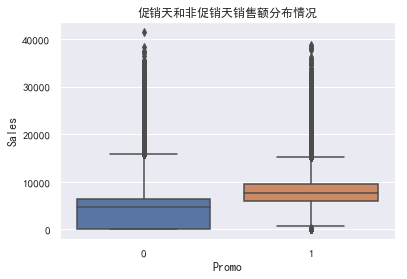

In [50]:
#对比促销天和非促销天销售分布情况
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new,ax=ax)
ax.set(**{'title':'促销天和非促销天销售额分布情况'})

[Text(0.5, 1.0, '促销天和非促销天销售分布情况')]

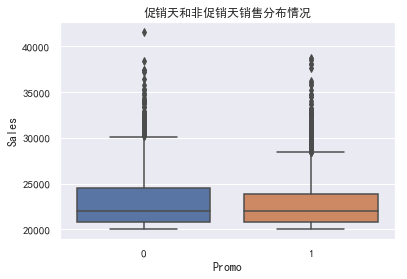

In [18]:
#对比促销天和非促销天销售分布情况(一天销售额超过20000的)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new[data_train_new.Sales>=20000],ax=ax)
ax.set(**{'title':'促销天和非促销天销售分布情况'})

可以发现，当天促销在销售额不超过20000时促销明显比非促销有更高的销售，然而对于销售额超过20000的，则促销与非促销形式就影响不大了。这说明促销对那些靠靠口碑等有着稳定忠诚客户的商店印象不大，而对那些没有忠诚顾客则可以通过促销活动短期内吸引更多关注。



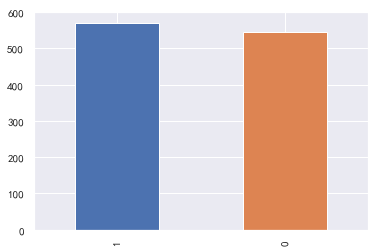

In [19]:
#有无promo2的店数量对比
df9=data_store.Promo2.value_counts()
df9.plot(kind='bar')

[Text(0.5, 1.0, '有无promo2的每天每个店销售情况对比')]

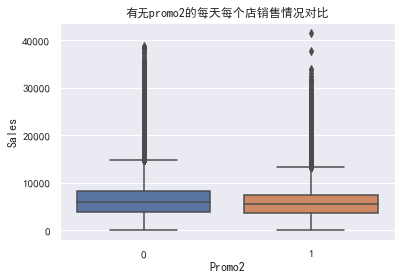

In [20]:
#有无promo2的每天每个店销售情况对比
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo2',data=data_train_new,ax=ax)
ax.set(**{'title':'有无promo2的每天每个店销售情况对比'})

[Text(0.5, 1.0, '有无promo2的店铺的平均每天销售情况对比(平均销售额大于10000的店)')]

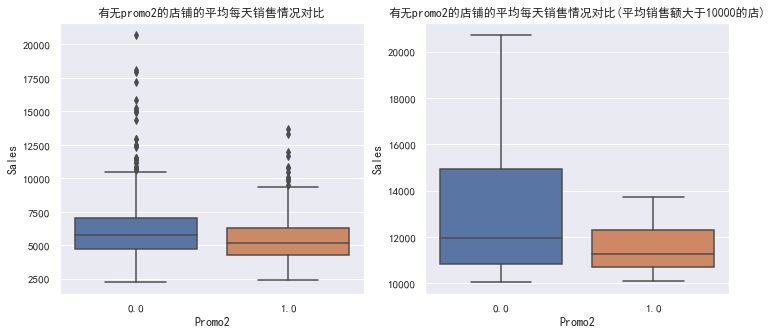

In [21]:
#有无promo2的店铺的平均每天销售情况对比
df10=data_train_new.groupby('Store')['Promo2','Sales'].mean()
fig=plt.figure(figsize=(12,5))
ax=fig.subplots(1,2)
sns.boxplot(y='Sales',x='Promo2',data=df10,ax=ax[0])
ax[0].set(**{'title':'有无promo2的店铺的平均每天销售情况对比'})
sns.boxplot(y='Sales',x='Promo2',data=df10[df10.Sales>=10000],ax=ax[1])
ax[1].set(**{'title':'有无promo2的店铺的平均每天销售情况对比(平均销售额大于10000的店)'})

看出有promo2的店平均销售情况比没有稍微好一点，而对于那些平均销售额大于10000的店，没有促销类型2的店销售额整体更好，这说明不以促销为主的店可能有更好的保留忠诚客户的方法，结合实际业务可以对这些店的运营模式做进一步分析来找出原因。

#  探索节假日对销售情况的影响

In [3]:
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='无'])


NameError: name 'sns' is not defined

In [2]:
#对比stateholiday销售分布情况
fig,ax=plt.subplots(1,3,sharey=True,figsize=(10,5))

#不是国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday=='无'],ax=ax[0])
ax[0].set(**{'title':'非国家假日销售分布'})

#国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='无'],ax=ax[1])
ax[1].set(**{'title':'国家假日销售分布'})

 #国家节假日的销售分布(营业的店)
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[(data_train_new.StateHoliday!='无')&(data_train_new.Sales>0)],ax=ax[2])
ax[2].set(**{'title':'国家假日销售分布(营业的店)'})

NameError: name 'plt' is not defined

节假日基本没有销售额,这应该是多数店都关门，而对于营业的店，其分布也和非节假日的分布差不多，由于节假日数据相对较少，相对非节假日的分布也更分散点。可以看出节假日如果营业，对于销售额的影响不是很大。

In [1]:
#对比SchoolHoliday销售分布情况
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

#SchoolHoliday的销售分布
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new)
ax.set(**{'title':'学校假期销售分布'})

# #SchoolHoliday的销售分布（Sales>=15000）
# sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new[data_train_new.Sales>=0],ax=ax[1])
# ax[1].set(**{'title':'学校假期销售分布（营业的店）'})

NameError: name 'plt' is not defined

学校是否放假对销售额的价格影响不大

# 探索不同类型商店销售额情况

[Text(0.5, 1.0, '不同StoreType的平均每天每个商店销售分布')]

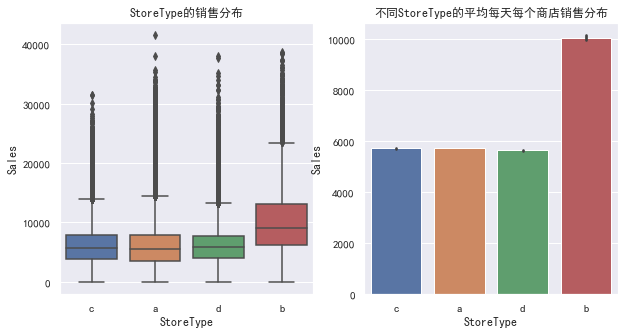

In [24]:
#StoreType
fig,ax=plt.subplots(1,2,figsize=(10,5))
#StoreType的销售分布
sns.boxplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'StoreType的销售分布'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[1])
ax[1].set(**{'title':'不同StoreType的平均每天每个商店销售分布'})

对于StoreType而言，可以看出b类型销售额比其他的高，a,c,d类型基本没什么差距

[Text(0.5, 1.0, '不同Assortment的平均每天每个商店销售分布')]

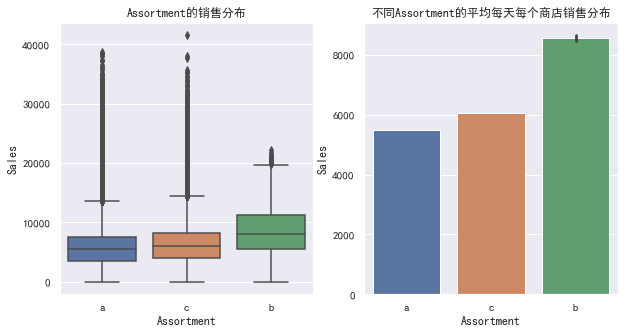

In [25]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
#Assortment的销售分布
sns.boxplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'Assortment的销售分布'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[1])
ax[1].set(**{'title':'不同Assortment的平均每天每个商店销售分布'})

对于Assortment，可以看出b类型最高，c比a类型高一些

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Text(0.5, 1.0, '顾客数与销售额的关系')]

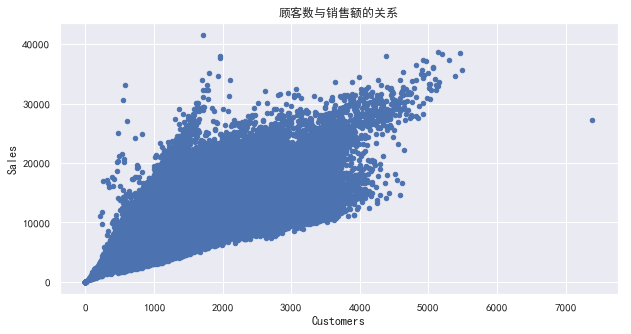

In [26]:
#顾客数与销售额的关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
data_train_new.plot.scatter(y='Sales',x='Customers',ax=ax)
ax.set(**{'title':'顾客数与销售额的关系'})

整体来看顾客数和销售额正相关

[Text(0.5, 1.0, '是否营业与销售额关系')]

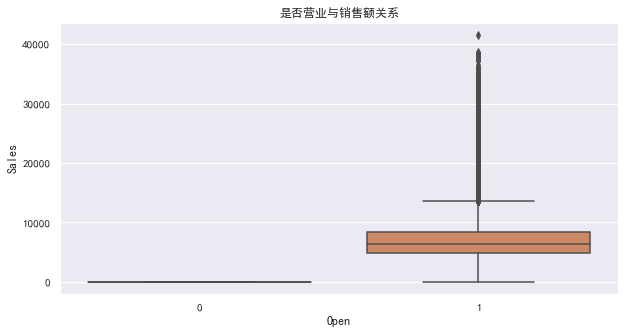

In [27]:
#探索是否营业与销售额关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Open',data=data_train_new,ax=ax)
ax.set(**{'title':'是否营业与销售额关系'})

不营业没有销售额，符合正常逻辑

# 总结
1. 通过从不同时间维度探索销售额变化，可以看出药品需求是有强周期性的，较明显为10-12月份，因此每年在10月份前需要备好库存才能保证销售顺利。

2. 通过对促销相关特征探索销售额不同，发现对于那些高销售额的的店基本不会受当天促销影响，说明这类店这类店经营的是忠诚客户，关注更多的是质量非价格。所以这些店的经营模式值得那些大型的店作为参考。而一般的店促销则是一个吸引顾客比较重要的手段。

3. 通过对国家节假日特征探索发现，节假日大部分店关闭，而如果坚持营业，由于供给变少，此时这些点能获得比以往更高的销售额。

# 特征工程

In [28]:
#删除顾客数一列
data_train=data_train.drop('Customers',axis=1)
#对data_test先做和data_train之前相同的变化
data_test.StateHoliday=data_test.StateHoliday.map({'0':'无',0:'无','a':'公共假日','b':'复活节假期','c':'圣诞节'})

#连接test表和train表
data_train_test=pd.concat([data_train,data_test.drop('Id',axis=1)],axis=0,ignore_index=True)
data_train_test.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store
522922,2014-03-20,4,1.0,1,5272.0,0,无,773
203515,2015-01-30,5,1.0,1,15073.0,0,无,586
893019,2013-04-22,1,1.0,1,7017.0,0,无,690
481645,2014-04-26,6,1.0,0,3130.0,0,无,751
266059,2014-11-30,7,0.0,0,0.0,0,无,834


In [29]:
#连接store表和train_test表
data_train_test=pd.merge(data_train_test,data_store,on='Store',how='left')
data_train_test.head(3)

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,5,1.0,1,5263.0,1,无,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2015-07-31,5,1.0,1,6064.0,1,无,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015-07-31,5,1.0,1,8314.0,1,无,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [30]:
#将时间类型转换
data_train_test.Date=pd.to_datetime(data_train_test.Date)
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 1058296
Data columns (total 17 columns):
Date                         1058297 non-null datetime64[ns]
DayOfWeek                    1058297 non-null int64
Open                         1058286 non-null float64
Promo                        1058297 non-null int64
Sales                        1017209 non-null float64
SchoolHoliday                1058297 non-null int64
StateHoliday                 1058297 non-null object
Store                        1058297 non-null int64
StoreType                    1058297 non-null object
Assortment                   1058297 non-null object
CompetitionDistance          1055559 non-null float64
CompetitionOpenSinceMonth    719733 non-null float64
CompetitionOpenSinceYear     719733 non-null float64
Promo2                       1058297 non-null int64
Promo2SinceWeek              533034 non-null float64
Promo2SinceYear              533034 non-null float64
PromoInterval                5330

In [31]:
#把日期时间分解
data_train_test['year']=data_train_test.Date.map(lambda x:x.year)
data_train_test['month']=data_train_test.Date.map(lambda x:x.month)
data_train_test['day']=data_train_test.Date.map(lambda x:x.day)
data_train_test['Date']=data_train_test.Date.map(lambda x:x.date())


NameError: name 'check_none' is not defined

In [32]:
#检查open列空值情况
sum(data_train_test.Open.isnull())

11

In [33]:
#查看这11行的缺失情况
data_train_test[data_train_test.Open.isnull()]

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
1017688,2015-09-17,4,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
1018544,2015-09-16,3,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
1019400,2015-09-15,2,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
1020256,2015-09-14,1,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14
1021968,2015-09-12,6,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,12
1022824,2015-09-11,5,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,11
1023680,2015-09-10,4,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,10
1024536,2015-09-09,3,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,9
1025392,2015-09-08,2,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,8
1026248,2015-09-07,1,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,7


In [34]:
data_train_test.loc[[1017688, 1018544, 1019400, 1020256, 1021968, 1022824, 1023680,
            1024536, 1025392, 1026248, 1027960],'Open']=1
data_train_test.loc[[1017688, 1018544, 1019400, 1020256, 1021968, 1022824, 1023680,
            1024536, 1025392, 1026248, 1027960]]

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
1017688,2015-09-17,4,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
1018544,2015-09-16,3,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
1019400,2015-09-15,2,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
1020256,2015-09-14,1,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14
1021968,2015-09-12,6,1.0,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,12
1022824,2015-09-11,5,1.0,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,11
1023680,2015-09-10,4,1.0,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,10
1024536,2015-09-09,3,1.0,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,9
1025392,2015-09-08,2,1.0,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,8
1026248,2015-09-07,1,1.0,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,7


In [35]:
index_null=data_train_test[data_train_test.Open.isnull()].index
data_train_test.loc[index_null,'Open']=1
sum(data_train_test.Open.isnull())#查看是否补全空值


0

In [36]:
#检查每列的空值行数
def check_none_col(data,column):
    print('{}的缺失行数：'.format(column),sum(data[column].isnull()))
    print('{}的缺失率：'.format(column),round(sum(data[column].isnull())/data.shape[0],3))
columns=['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
         'Promo2SinceWeek','Promo2SinceYear','PromoInterval']   
for i in columns:
    check_none_col(data_store,i)

CompetitionDistance的缺失行数： 3
CompetitionDistance的缺失率： 0.003
CompetitionOpenSinceMonth的缺失行数： 354
CompetitionOpenSinceMonth的缺失率： 0.317
CompetitionOpenSinceYear的缺失行数： 354
CompetitionOpenSinceYear的缺失率： 0.317
Promo2SinceWeek的缺失行数： 544
Promo2SinceWeek的缺失率： 0.488
Promo2SinceYear的缺失行数： 544
Promo2SinceYear的缺失率： 0.488
PromoInterval的缺失行数： 544
PromoInterval的缺失率： 0.488


In [37]:
#查看缺失列与sales的相关关系
data_tem=pd.concat([data_train_test[columns],data_train_test.Sales],axis=1)
data_tem.corr()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Sales
CompetitionDistance,1.000000,-0.059595,0.025997,-0.055272,-0.108762,-0.019229
CompetitionOpenSinceMonth,-0.059595,1.000000,-0.059889,-0.034530,0.049577,-0.028257
CompetitionOpenSinceYear,0.025997,-0.059889,1.000000,-0.080417,0.010982,0.012659
Promo2SinceWeek,-0.055272,-0.034530,-0.080417,1.000000,-0.242425,0.059558
Promo2SinceYear,-0.108762,0.049577,0.010982,-0.242425,1.000000,-0.021127
Sales,-0.019229,-0.028257,0.012659,0.059558,-0.021127,1.000000


可以看出这几列缺失对于销售额影响非常小，因此可以通过众数或平均值填补。

In [39]:
#备份数据，以防改错数据
data_safe=data_train_test
#平均值填补距离
data_train_test.CompetitionDistance=data_train_test.CompetitionDistance.fillna(data_train_test.CompetitionDistance.mean())
#众数填补其他
for i in columns:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mode()[0])#mode返回series，不是一个数


# 数据类型转换

In [40]:
data_train_test.dtypes

Date                          object
DayOfWeek                      int64
Open                         float64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
year                           int64
month                          int64
day                            int64
dtype: object

In [41]:
#浮点数转为整数
def convert_to_int(data,columns):
    for i in columns:
        data[i]=data[i].astype(np.int64)
    return data
columns_float=['Open','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']
data_train_test=convert_to_int(data_train_test,columns_float)
data_train_test.dtypes

Date                          object
DayOfWeek                      int64
Open                           int64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth      int64
CompetitionOpenSinceYear       int64
Promo2                         int64
Promo2SinceWeek                int64
Promo2SinceYear                int64
PromoInterval                 object
year                           int64
month                          int64
day                            int64
dtype: object

In [42]:
#将数值数据转化为分类数据
def convert_to_object(data,columns):
    for i in columns:
        data[i]=data[i].astype(np.str)
    return data
columns_classify=['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','year','month','day']
data_train_test=convert_to_object(data_train_test,columns_classify)
data_train_test.dtypes

Date                          object
DayOfWeek                     object
Open                           int64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth     object
CompetitionOpenSinceYear      object
Promo2                         int64
Promo2SinceWeek               object
Promo2SinceYear               object
PromoInterval                 object
year                          object
month                         object
day                           object
dtype: object

# 特征处理

In [43]:
#查看数据唯一值数量
check_unique(data_train_test)#该函数见上篇数据处理部分

NameError: name 'check_unique' is not defined

In [ ]:
#发现PromoInterval只有3个数，查看情况
data_store['PromoInterval'].value_counts()

可以得出做prom2的都是间隔3个月，所以一共只有3种分类

In [ ]:
#分类数据二值化处理
def convert_to_twovalues(data,columns):
    connect_column=[]
    for i in columns:
        df_tem=pd.get_dummies(data[i],prefix=i)
        connect_column.append(df_tem)
    data_new=pd.concat(connect_column,axis=1)
    return data_new
columns_value_processing=['DayOfWeek','StateHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                          'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','year','month','day']
data_value_processing=convert_to_twovalues(data_train_test,columns_value_processing)
data_value_processing.head()

In [44]:
#对一行多个值进行二值化处理,使用每行值是多个值的
#之前以为‘PromoInterval’需要这样处理所以做了这个函数，本次项目不需要，可保留作为以后项目备用
def convert_to_twovalues_more(data,column):
    month=[]
    for i in data[column]:
        month.extend(i.split(','))#注意要把字符串变成列表
    index_list=pd.Index(list(set(month)))
    print(index_list)
    data_new=pd.DataFrame(np.zeros([data.shape[0],len(index_list)]),columns=index_list)
    for i,data in enumerate(data[column]):
        column_position=index_list.get_indexer(data.split(','))
        data_new.iloc[i,column_position]=1
    return data_new
#直接运行速度很慢，所以现在data_store修改再连接,此代码留到以后使用

In [45]:
#数值类型进行归一化(0-1范围)
def feature_standarize(data,columns):
    combine_col=[]
    for j in columns:
        min_=data[j].min()
        max_=data[j].max()
        standard_col=data[j].apply(lambda x:(x-min_)/(max_-min_))#标准化为0-1范围
        #standard_col=data[j].apply(lambda x:(x-data[j].min())/(data[j].max()-data[j].min()))这样运行很慢，因为每次都要找min，max
        combine_col.append(standard_col)
    data_new2=pd.concat(combine_col,axis=1)
    return data_new2

data_CompetitionDistance=feature_standarize(data_train_test,['CompetitionDistance'])
data_CompetitionDistance.head()

,CompetitionDistance
0,0.016482
1,0.007252
2,0.186050
3,0.007911
4,0.394119


In [46]:
#连接数据data_value_processing，data_CompetitionDistance，data_train_test未作修改的列

data_train_test_new=pd.concat([data_value_processing,data_CompetitionDistance,data_train_test[['Open','Promo','SchoolHoliday','Promo2']]],axis=1)
data_train_test_new.info()

NameError: name 'data_value_processing' is not defined